In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install octis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-11-19 20:14:36.077932: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 6.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import spacy
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/abcnews-date-text.csv', encoding='utf-8')

In [ ]:
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
df_headlines=df['headline_text']
df_headlines.head()

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [ ]:
def count_words(data):
  counts=[]
  for i in range(len(data)):
    counts.append(len(data[i].split()))
  return counts
word_count_list=count_words(df_headlines)

In [ ]:
mean_word_count = np.mean(word_count_list)
max_word_count = np.max(word_count_list)
min_word_count = np.min(word_count_list)
total_word_count = np.sum(word_count_list)
print(f'The average word count length of the document is: ', mean_word_count)
print(f'The maximum length of the document is: ', max_word_count)
print(f'The minimum length of the document is: ', min_word_count)
print(f'The total length of the document is: ', total_word_count)

The average word count length of the document is:  6.398974585794944
The maximum length of the document is:  15
The minimum length of the document is:  1
The total length of the document is:  7089072


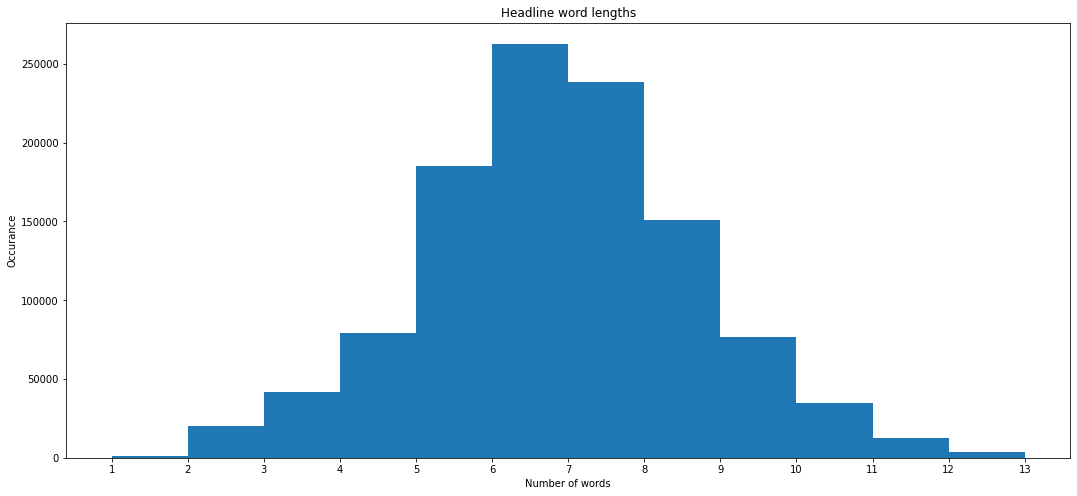

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(word_count_list, bins=range(1,14) )
ax.set_title('Headline word lengths')
ax.set_xticks(range(1,14))
ax.set_xlabel('Number of words')
ax.set_ylabel('Occurance')
plt.show()

In [ ]:
def list_of_text(dataset):
  result =[]
  for i in range(len(dataset)):
    result.append(dataset[i])
  return result

In [ ]:
headlines_list = list_of_text(df_headlines)
len(headlines_list)

1107845

In [ ]:
count_vectorizer = CountVectorizer()
headlines_word_count_vectorizer = count_vectorizer.fit_transform(headlines_list)
words = count_vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


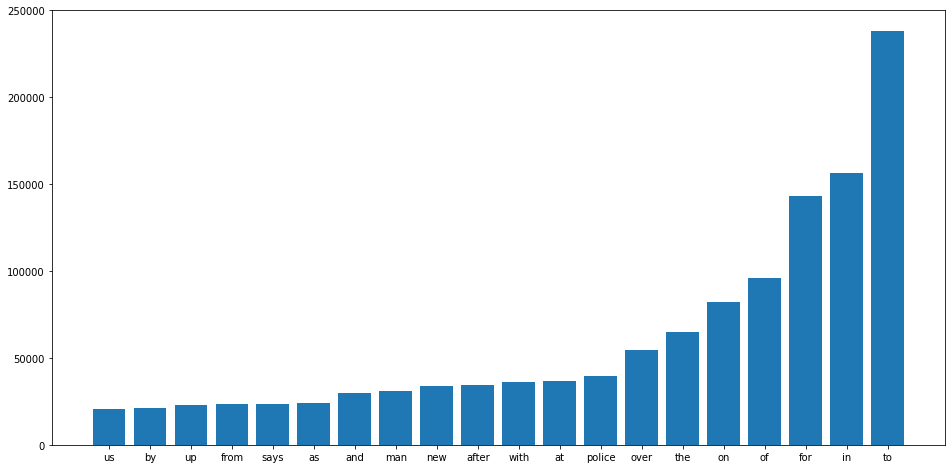

In [ ]:
sum_of_words=headlines_word_count_vectorizer.sum(axis=0)
sum_of_word_list = np.squeeze(np.asarray(sum_of_words))
sorted_sum_of_words = np.sort(np.squeeze(np.asarray(sum_of_words)))
sorted_sum_of_words_index = np.argsort(np.squeeze(np.asarray(sum_of_words)))
top_50_words=[words[i] for i in sorted_sum_of_words_index][-20:]
top_50_words_occurrance = [sorted_sum_of_words[i] for i in range(len(sorted_sum_of_words))][-20:]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(top_50_words, top_50_words_occurrance)
plt.show()

In [ ]:
df_headlines.shape

(1244184,)

In [ ]:
df_headlines_no_duplicates=df_headlines.drop_duplicates()
df_headlines_no_duplicates.shape

(1213004,)

In [ ]:
nlp = spacy.load("en_core_web_sm")
def lower_case(s):
  s_lower=s.lower()
  #s_remove_non_alphbetic=regex.sub(r'[^a-z]+', ' ', s_lower).strip()
  return s_lower

In [ ]:
df_headlines_lower_case = df_headlines_no_duplicates.apply(lower_case)

In [ ]:
from nltk.corpus.reader.tagged import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
def stop_words(s):
  tokenize = word_tokenize(s)
  stop_words = set(stopwords.words('english'))
  result = [word for word in tokenize if not word in stop_words]
  out = " ".join(result)
  return out
df_headlines_lower_case=df_headlines_lower_case.apply(stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df_headlines_lower_case

0                 aba decides community broadcasting licence
1                   act fire witnesses must aware defamation
2                   g calls infrastructure protection summit
3                          air nz staff aust strike pay rise
4                 air nz strike affect australian travellers
                                 ...                        
1244179    two aged care residents die state records 2 ; 093
1244180      victoria records 5 ; 919 new cases seven deaths
1244181      wa delays adopting new close contact definition
1244182    western ringtail possums found badly dehydrate...
1244183                  makes close covid contact new rules
Name: headline_text, Length: 1213004, dtype: object

In [ ]:
lemma_result=[]
for doc in nlp.pipe(df_headlines_lower_case.astype('unicode').values, batch_size=100, n_process=3):
  if doc.is_parsed:
    lemma_result.append([i.lemma_ for i in doc])
df_headlines_lower_case['lemma']=lemma_result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_headlines_preprocessed=pd.DataFrame(df_headlines_lower_case['lemma'])

In [ ]:
df_headlines_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,aba,decide,community,broadcasting,licence,None,None,None,None,None,None,None,None
1,act,fire,witness,must,aware,defamation,None,None,None,None,None,None,None
2,g,call,infrastructure,protection,summit,None,None,None,None,None,None,None,None
3,air,nz,staff,aust,strike,pay,rise,None,None,None,None,None,None
4,air,nz,strike,affect,australian,traveller,None,None,None,None,None,None,None


In [ ]:
df_headlines_preprocessed.to_csv('/content/drive/MyDrive/preprocessed_abc_1.csv')

In [ ]:
import csv

with open('/content/drive/MyDrive/preprocessed_abc_1.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

In [ ]:
data[5]

['4',
 'air',
 'nz',
 'strike',
 'affect',
 'australian',
 'traveller',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [ ]:
for index in range(len(data)):
  data[index].pop(0)

In [ ]:
data =[list(filter(None, i)) for i in data]
del data[0]

In [ ]:
data[4]

['air', 'nz', 'strike', 'affect', 'australian', 'traveller']

In [ ]:
data =[list(filter(lambda element: len(element)!=2, i)) for i in data]
data =[list(filter(lambda element: len(element)!=1, i)) for i in data]

In [ ]:
df_headlines_final=pd.DataFrame(list(zip(data)), columns=['headlines_array'])

In [ ]:
df_headlines_final.head()

,headlines_array
0,"[aba, decide, community, broadcasting, licence]"
1,"[act, fire, witness, must, aware, defamation]"
2,"[call, infrastructure, protection, summit]"
3,"[air, staff, aust, strike, pay, rise]"
4,"[air, strike, affect, australian, traveller]"


In [ ]:
from gensim import corpora, models
dict_of_inputs = corpora.Dictionary(df_headlines_final['headlines_array'])

In [ ]:
input_corpous=[dict_of_inputs.doc2bow(input) for input in df_headlines_final['headlines_array']]

In [ ]:
model = models.TfidfModel(input_corpous)

In [ ]:
tfidf_input=model[input_corpous]

In [ ]:
tfidf_input[0]

[(0, 0.5561735474286991),
 (1, 0.5617641744043795),
 (2, 0.2891502255588444),
 (3, 0.3849011978382397),
 (4, 0.3785963714278047)]

In [ ]:
import time
start_time=time.time()
LDA = models.LdaMulticore(tfidf_input, num_topics=10, id2word=dict_of_inputs)
print('The execution is: %s' %(time.time()-start_time))

The execution is: 431.6546628475189


In [ ]:
for idx, topic in LDA.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.030*"victoria" + 0.026*"trump" + 0.020*"donald" + 0.014*"covid" + 0.013*"case" + 0.012*"coronavirus" + 0.010*"australias" + 0.009*"australia" + 0.009*"record" + 0.008*"new"
Topic: 1 Word: 0.015*"victorian" + 0.012*"2020" + 0.010*"speak" + 0.010*"joe" + 0.008*"program" + 0.008*"mask" + 0.007*"video" + 0.007*"vaccination" + 0.007*"covid" + 0.006*"coronavirus"
Topic: 2 Word: 0.034*"queensland" + 0.021*"restriction" + 0.015*"covid" + 0.015*"coronavirus" + 0.012*"new" + 0.009*"island" + 0.009*"case" + 0.008*"zealand" + 0.007*"liberal" + 0.006*"positive"
Topic: 3 Word: 0.027*"border" + 0.019*"quarantine" + 0.013*"travel" + 0.012*"premier" + 0.012*"amid" + 0.011*"coronavirus" + 0.010*"covid" + 0.008*"old" + 0.008*"2021" + 0.008*"berejiklian"
Topic: 4 Word: 0.017*"scott" + 0.017*"biden" + 0.012*"update" + 0.011*"care" + 0.010*"aged" + 0.009*"andrews" + 0.008*"coronavirus" + 0.008*"australia" + 0.007*"country" + 0.007*"disability"
Topic: 5 Word: 0.017*"government" + 0.010*"heal

In [ ]:
import time
start_time=time.time()
NMF = models.nmf.Nmf(tfidf_input, num_topics=10, id2word=dict_of_inputs)
print('The execution is: %s' %(time.time()-start_time))

The execution is: 513.3611369132996


In [ ]:
for idx, topic in NMF.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.108*"govt" + 0.032*"urge" + 0.011*"nsw" + 0.011*"vic" + 0.009*"fund" + 0.009*"qld" + 0.008*"not" + 0.006*"accuse" + 0.006*"fire" + 0.006*"funding"
Topic: 1 Word: 0.056*"crash" + 0.051*"kill" + 0.029*"car" + 0.017*"die" + 0.015*"two" + 0.012*"fatal" + 0.010*"plane" + 0.010*"injure" + 0.010*"road" + 0.010*"driver"
Topic: 2 Word: 0.057*"water" + 0.041*"call" + 0.012*"face" + 0.008*"war" + 0.008*"ban" + 0.007*"restriction" + 0.006*"set" + 0.005*"price" + 0.005*"anti" + 0.004*"may"
Topic: 3 Word: 0.040*"miss" + 0.029*"death" + 0.025*"search" + 0.022*"find" + 0.013*"rise" + 0.012*"continue" + 0.012*"woman" + 0.009*"toll" + 0.008*"road" + 0.007*"body"
Topic: 4 Word: 0.059*"council" + 0.016*"claim" + 0.009*"hit" + 0.009*"back" + 0.008*"world" + 0.007*"cup" + 0.007*"high" + 0.006*"rate" + 0.006*"reject" + 0.006*"take"
Topic: 5 Word: 0.041*"new" + 0.013*"boost" + 0.008*"get" + 0.008*"health" + 0.007*"farmer" + 0.007*"group" + 0.006*"service" + 0.006*"fund" + 0.005*"seek" + 0.005

In [ ]:
import time
start_time=time.time()
LSA = models.LsiModel(tfidf_input, num_topics=10, id2word=dict_of_inputs)
print('The execution is: %s' %(time.time()-start_time))


The execution is: 497.9315643310547


In [ ]:
for idx, topic in LSA.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.452*"man" + 0.370*"police" + 0.287*"charge" + 0.161*"court" + 0.145*"murder" + 0.133*"face" + 0.123*"crash" + 0.121*"woman" + 0.117*"new" + 0.115*"death"
Topic: 1 Word: -0.408*"man" + -0.275*"charge" + 0.232*"govt" + 0.231*"new" + 0.212*"plan" + 0.196*"council" + 0.141*"say" + 0.132*"urge" + 0.124*"call" + -0.118*"murder"
Topic: 2 Word: 0.791*"police" + -0.258*"man" + -0.241*"charge" + -0.182*"court" + -0.173*"face" + 0.136*"probe" + 0.131*"investigate" + -0.117*"govt" + 0.090*"search" + 0.089*"miss"
Topic: 3 Word: -0.854*"govt" + -0.199*"urge" + 0.154*"new" + 0.151*"coronavirus" + 0.130*"kill" + -0.119*"police" + 0.111*"australia" + 0.077*"australian" + 0.073*"crash" + -0.062*"charge"
Topic: 4 Word: -0.579*"kill" + -0.382*"crash" + -0.207*"govt" + 0.201*"police" + -0.196*"iraq" + 0.193*"council" + -0.180*"car" + 0.176*"charge" + 0.169*"plan" + 0.119*"face"
Topic: 5 Word: -0.827*"coronavirus" + -0.239*"covid" + 0.208*"council" + 0.190*"plan" + -0.159*"govt" + -0.153*"c

In [ ]:
common_text1 = data
common_dict = dict_of_inputs

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_texts, common_dictionary
cm_LDA = CoherenceModel(model=LDA, texts=common_text1, dictionary=common_dict, coherence='u_mass')
coherence_score_LDA = cm_LDA.get_coherence()
cm_NMF = CoherenceModel(model=NMF, texts=common_text1, dictionary=common_dict, coherence='u_mass')
coherence_score_NMF = cm_NMF.get_coherence()
cm_LSA = CoherenceModel(model=LSA, texts=common_text1, dictionary=common_dict, coherence='u_mass')
coherence_score_LSA = cm_LSA.get_coherence()

In [ ]:
print(f'The LDA Coherence Score is: ', coherence_score_LDA)
print(f'The NMF Coherence Score is: ', coherence_score_NMF)
print(f'The LSA Coherence Score is: ', coherence_score_LSA)

The LDA Coherence Score is:  -7.354327767203631
The NMF Coherence Score is:  -5.026177764794607
The LSA Coherence Score is:  -5.241952582473637


In [ ]:
def get_topic(model):
  output=[]
  for i in model.get_topics():
    top_10=list(reversed(np.argsort(i)))[:10]
    top_10_words = [dict_of_inputs[j] for j in top_10]
    output.append(top_10_words)
  return output

In [ ]:
output_NMF={}
output_LDA={}
output_LSA={}
topic_words_NMF = get_topic(NMF)
topic_words_LDA = get_topic(LDA)
topic_words_LSA = get_topic(LSA)
output_NMF['topics']=topic_words_NMF
output_LDA['topics']=topic_words_LDA
output_LSA['topics']=topic_words_LSA

In [ ]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
topic_diversity = TopicDiversity(topk=10)
diversity_score_NMF = topic_diversity.score(output_NMF)
diversity_score_LDA = topic_diversity.score(output_LDA)
diversity_score_LSA = topic_diversity.score(output_LSA)

In [ ]:
print(f'The LDA Topic Diversity Score is: ', diversity_score_LDA)
print(f'The NMF Topic Diversity Score is: ', diversity_score_NMF)
print(f'The LSA Topic Diversity Score is: ', diversity_score_LSA)

The LDA Topic Diversity Score is:  0.84
The NMF Topic Diversity Score is:  0.9
The LSA Topic Diversity Score is:  0.57


In [ ]:
from octis.evaluation_metrics.similarity_metrics import RBO
similarity = RBO(topk=10)
similarity_NMF = similarity.score(output_NMF)
similarity_LDA = similarity.score(output_LDA)
similarity_LSA = similarity.score(output_LSA)

In [ ]:
print(f'The LDA Topic Similarity Score is: ', similarity_LDA)
print(f'The NMF Topic Similarity Score is: ', similarity_NMF)
print(f'The LSA Topic Similarity Score is: ', similarity_LSA)

The LDA Topic Similarity Score is:  0.054898088832857184
The NMF Topic Similarity Score is:  0.01463097677142855
The LSA Topic Similarity Score is:  0.13585046303444448


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot_wordcloud(model, topic_num):
  wordcloud = WordCloud(
      background_color='white',
      width=2500,
      height=1800,
      max_words=10
  )
  topic_words=dict(model.show_topics(formatted=False)[topic_num][1])
  wordcloud.generate_from_frequencies(topic_words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.title('Topic %d' %topic_num)


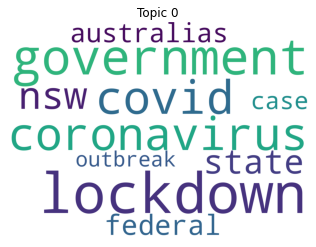

In [ ]:
plot_wordcloud(LDA,0)

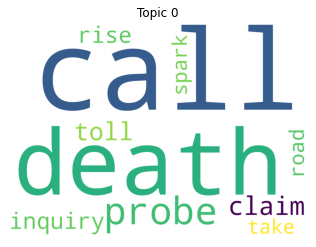

In [ ]:
plot_wordcloud(NMF,0)

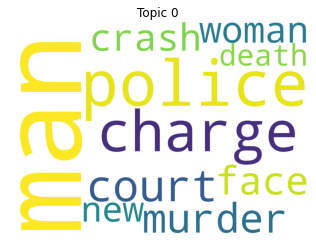

In [ ]:
plot_wordcloud(LSA,0)

In [ ]:
from collections import Counter
def get_topic_dis(model):
  a=model.get_document_topics(input_corpous)
  results=[]
  for i in range(len(a)):
    results.append(a[i])
  final=[]
  for j in range(len(results)):
    temp = list(dict(results[j]).values())
    final.append(np.array(temp[:10]))

  res = np.asarray(final, dtype=object)

  keys=[]
  for k in range(len(res)):
    keys.append(res[k].argmax(axis=0))
  final_keys=np.array(keys)

  P =Counter(final_keys).items()
  num_topics=[pair[0] for pair in P]
  counts=[pair[1] for pair in P]
  return num_topics, counts

In [ ]:
from collections import Counter
def get_topic_distribution(model):
  gens_keys = model.get_topics().argmax(axis=0)
  pairs =Counter(gens_keys).items()
  num_topics=[pair[0] for pair in pairs]
  counts=[pair[1] for pair in pairs]
  return num_topics, counts

In [ ]:
num_topics_LDA, counts_LDA = get_topic_dis(LDA)

In [ ]:
num_topics_NMF, counts_NMF = get_topic_distribution(NMF)
num_topics_LSA, counts_LSA = get_topic_distribution(LSA)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as genvis
pyLDAvis.enable_notebook()
vis=genvis.prepare(LDA, input_corpous, dict_of_inputs)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.115268  0.144812       1        1  13.407513
4      0.320711  0.120369       2        1  13.296756
8      0.030383 -0.316731       3        1   9.990417
5     -0.090019  0.062768       4        1   9.900102
1      0.067367  0.042243       5        1   9.531704
6     -0.122072 -0.123064       6        1   9.349761
3     -0.002891  0.107927       7        1   9.334027
2     -0.101419  0.067348       8        1   9.144665
0      0.149603 -0.111110       9        1   8.598290
7     -0.136396  0.005437      10        1   7.446765, topic_info=            Term          Freq         Total Category  logprob  loglift
2402  queensland  19186.000000  19186.000000  Default  30.0000  30.0000
9634       trump  17538.000000  17538.000000  Default  29.0000  29.0000
2735      border  17635.000000  17635.000000  Default  28.0000  28.0000
440      vaccine  16338.000000  16338.000000  Default  27.0000  27.0000
1751    victoria  20331.000000  20331.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1047        post   2347.635899   3447.567019  Topic10  -5.3260   2.2131
341         case   4190.208783  23990.205820  Topic10  -4.7467   0.8525
45     australia   3487.729782  31430.550323  Topic10  -4.9302   0.3989
433          new   2729.845287  25537.533420  Topic10  -5.1752   0.3615
799         late   2039.582684   4376.772177  Topic10  -5.4667   1.8338

[470 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
3920       6  0.999209      100
49371     10  0.999005     2019
14167      6  0.999766     2020
38175      1  0.000272     2021
38175      3  0.998271     2021
...      ...       ...      ...
407        3  0.123496    young
407        4  0.008295    young
407        9  0.602920    young
435        3  0.999614  zealand
11183      6  0.999446     zero

[802 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 9, 6, 2, 7, 4, 3, 1, 8])

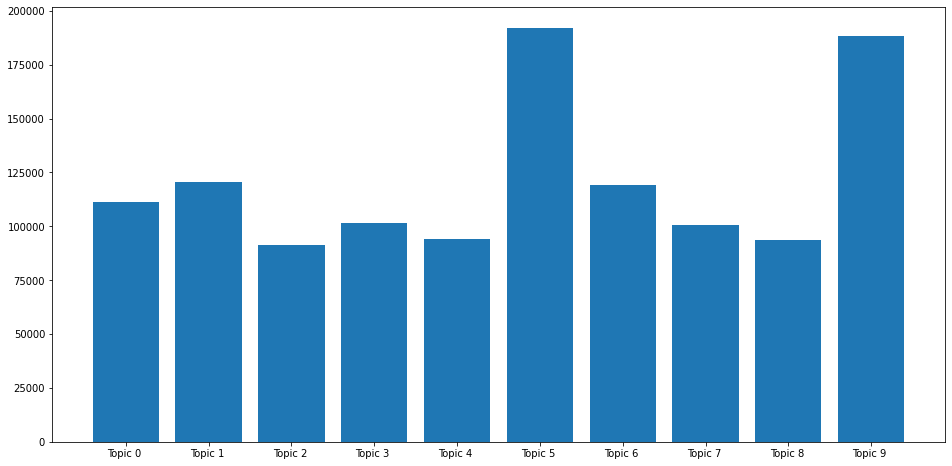

In [ ]:
labels=['Topic {} '.format(i) for i in num_topics_LDA]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(num_topics_LDA, counts_LDA)
ax.set_xticks(num_topics_LDA)
ax.set_xticklabels(labels)
plt.show()

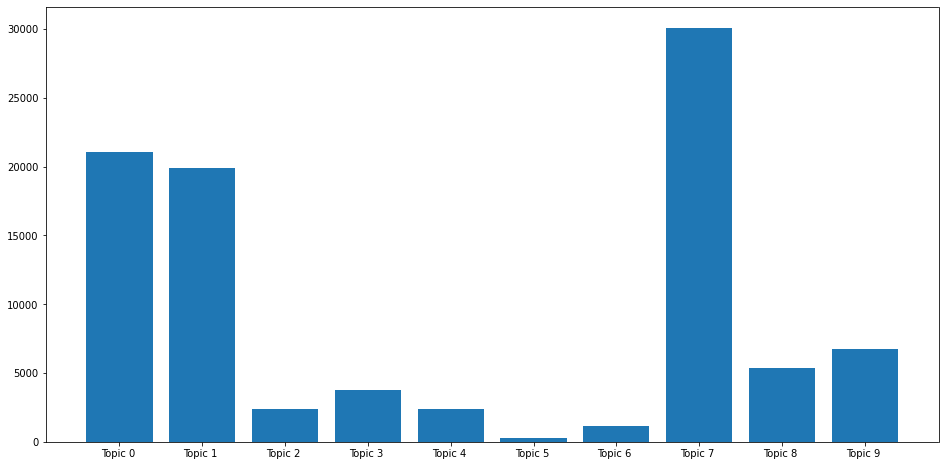

In [ ]:
labels=['Topic {} '.format(i) for i in num_topics_LSA]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(num_topics_LSA, counts_LSA)
ax.set_xticks(num_topics_LSA)
ax.set_xticklabels(labels)
plt.show()

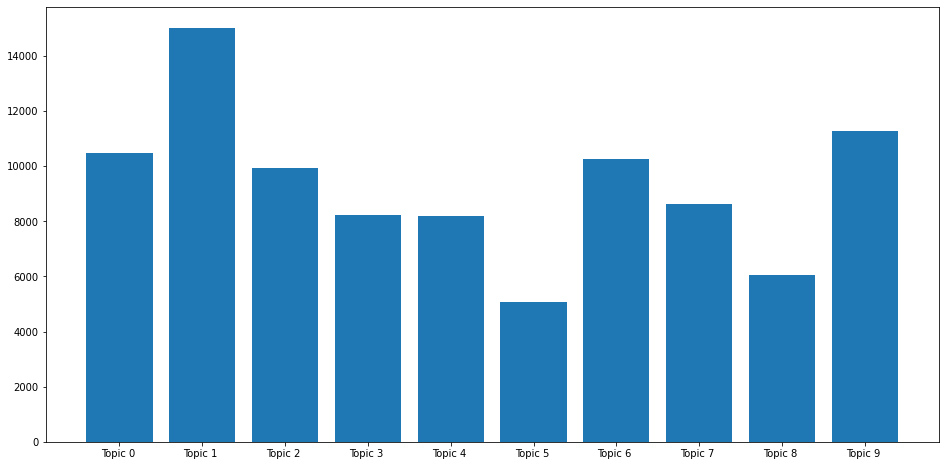

In [ ]:
labels=['Topic {} '.format(i) for i in num_topics_NMF]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(num_topics_NMF, counts_NMF)
ax.set_xticks(num_topics_NMF)
ax.set_xticklabels(labels)
plt.show()